<a href="https://colab.research.google.com/github/ahmedmoustafa/glioma/blob/main/glioma_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Glioma

In [1]:
import pandas as pd # Import the pandas package using the alias 'pd'
import seaborn as sns # Import the seaborn package using the alias 'sns'

In [2]:
df = pd.read_table("glioma.tsv") # Read and load the tsv data file into a DataFrame
df.shape

(839, 10)

In [3]:
df.head()

,ID,Grade,Sex,Age_at_diagnosis,Race,TP53,PTEN,EGFR,NF1,NOTCH1
0,1,0,0,51.30,0,0,0,0,0,0
1,2,0,0,38.72,0,0,0,0,0,0
2,3,0,0,35.17,0,1,0,0,0,0
3,4,0,1,32.78,0,1,0,0,0,0
4,5,0,0,31.51,0,1,0,0,0,0


---
**Q1: What is the median age at diagnosis for both Glioblastoma Multiforme (GBM) and Low-Grade Glioma (LGG)? (5 points numerical answer + 5 points graphical answer)**

In [4]:
df.groupby(['Grade']).agg(Median_Age = ('Age_at_diagnosis', 'median')).reset_index()

,Grade,Median_Age
0,0,41.610
1,1,61.395


<Axes: xlabel='Grade', ylabel='Age_at_diagnosis'>

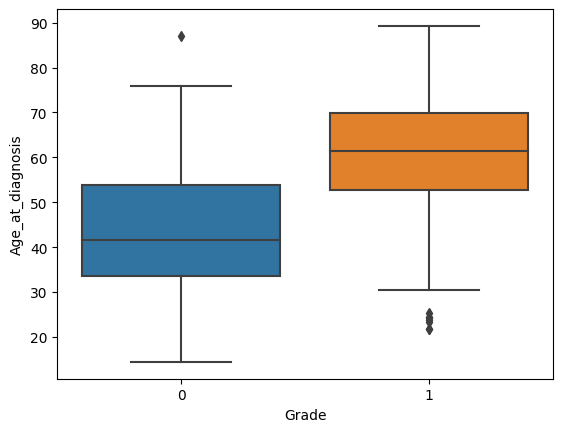

In [5]:
sns.boxplot(data = df, x = 'Grade', y = 'Age_at_diagnosis')

---
**Q2: Which glioma grade has a higher prevalence in males compared to females? (5 points numerical answer + 5 points graphical answer)**

In [6]:
grades_counts_by_sex = df.groupby(['Grade', 'Sex']).size().reset_index(name = 'Count')
grades_counts_by_sex

,Grade,Sex,Count
0,0,0,271
1,0,1,216
2,1,0,217
3,1,1,135


<Axes: xlabel='Grade', ylabel='Count'>

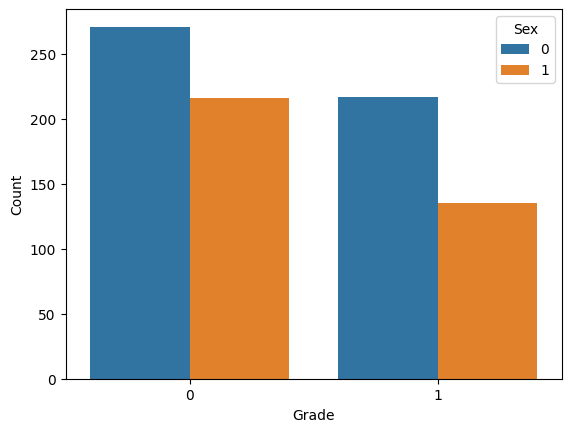

In [7]:
sns.barplot(data = grades_counts_by_sex, x = 'Grade', y = 'Count', hue = 'Sex')

---
**Q3: What is the median age at diagnosis for Glioblastoma Multiforme (GBM) and Low-Grade Glioma (LGG) when considering sex? (5 points numerical answer + 5 points graphical answer)**

In [8]:
df.groupby(['Grade', 'Sex']).agg(Median_Age = ('Age_at_diagnosis', 'median')).reset_index()

,Grade,Sex,Median_Age
0,0,0,40.68
1,0,1,43.42
2,1,0,61.10
3,1,1,62.11


<Axes: xlabel='Grade', ylabel='Age_at_diagnosis'>

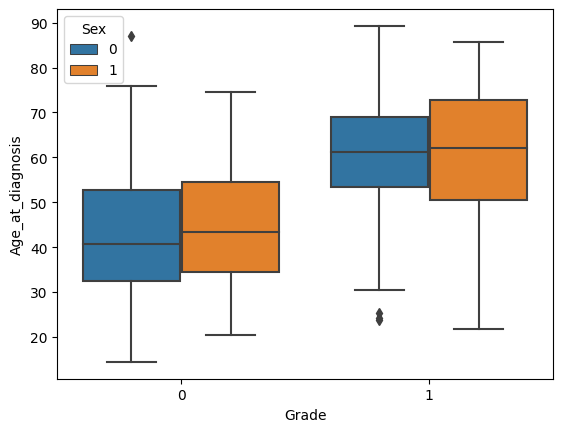

In [9]:
sns.boxplot(data = df, x = 'Grade', y = 'Age_at_diagnosis', hue = 'Sex')

---
**Q4: Is there a difference in age at diagnosis based on the patient's race? (5 points numerical answer + 5 points graphical answer)**

In [10]:
df.groupby(['Race']).agg(Median_Age = ('Age_at_diagnosis', 'median')).reset_index()

,Race,Median_Age
0,0,51.470
1,1,53.370
2,2,48.725
3,3,47.450


<Axes: xlabel='Race', ylabel='Age_at_diagnosis'>

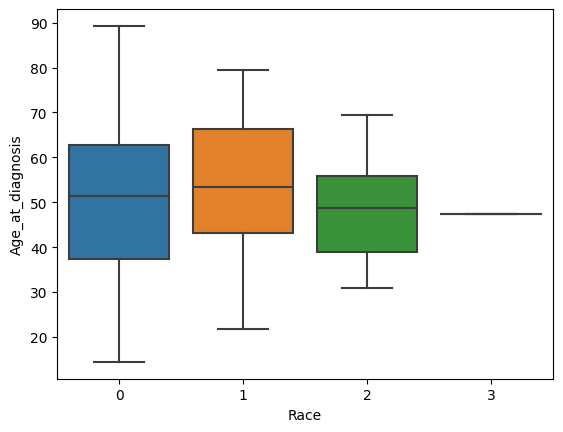

In [11]:
sns.boxplot(data = df, x = 'Race', y = 'Age_at_diagnosis')

---
**Q5: Among the five mentioned genes, which one is more frequently mutated in each glioma grade? (5 points numerical  + 5 points graphical answer)**

In [12]:
df.groupby(['Grade']).agg(TP53 = ('TP53', 'sum'),
                          PTEN = ('PTEN', 'sum'),
                          EGFR = ('EGFR', 'sum'),
                          NF1 = ('NF1', 'sum'),
                          NOTCH1 = ('NOTCH1', 'sum')).reset_index()

,Grade,TP53,PTEN,EGFR,NF1,NOTCH1
0,0,235,25,31,29,38
1,1,113,116,81,38,0


---
**Q6: Do mutation frequencies of the mentioned genes vary according to the patient's race? (5 points numerical answer + 5 points graphical answer)**

In [13]:
df.groupby(['Grade', 'Race']).agg(TP53 = ('TP53', 'sum'),
                          PTEN = ('PTEN', 'sum'),
                          EGFR = ('EGFR', 'sum'),
                          NF1 = ('NF1', 'sum'),
                          NOTCH1 = ('NOTCH1', 'sum')).reset_index()

,Grade,Race,TP53,PTEN,EGFR,NF1,NOTCH1
0,0,0,227,22,28,26,37
1,0,1,7,3,3,2,0
2,0,2,1,0,0,1,1
3,0,3,0,0,0,0,0
4,1,0,100,103,70,34,0
5,1,1,11,12,10,4,0
6,1,2,2,1,1,0,0


---
**Q7: In individual patients, who has the highest number of mutations across all the mentioned genes? (5 *bonus* points numerical answer)**

First, we need to calculate the total number of mutations per patient by summing the values (1's and 0's) across the five genes for each patient. We will create a new column called 'Total_Mutations' using the assign() function to store these sums.

In [14]:
df2 = df.assign(Total_Mutations = df['TP53'] + df['PTEN'] + df['EGFR'] + df['NF1'] + df['NOTCH1'])
df2

,ID,Grade,Sex,Age_at_diagnosis,Race,TP53,PTEN,EGFR,NF1,NOTCH1,Total_Mutations
0,1,0,0,51.30,0,0,0,0,0,0,0
1,2,0,0,38.72,0,0,0,0,0,0,0
2,3,0,0,35.17,0,1,0,0,0,0,1
3,4,0,1,32.78,0,1,0,0,0,0,1
4,5,0,0,31.51,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
834,835,1,1,77.89,0,0,1,0,0,0,1
835,836,1,0,85.18,0,1,1,0,0,0,2
836,837,1,1,77.49,0,1,1,0,0,0,2
837,838,1,0,63.33,0,1,0,0,0,0,1


Next, we can sort the data frame `df2` based on the newly created `Total_Mutations` column in descending order. By examining the patient at the top of the sorted list, we can identify the patient with the largest number of mutations.

In [15]:
df2.sort_values('Total_Mutations', ascending = False)

,ID,Grade,Sex,Age_at_diagnosis,Race,TP53,PTEN,EGFR,NF1,NOTCH1,Total_Mutations
357,358,0,1,35.15,0,1,1,1,1,1,5
766,767,1,1,53.64,0,1,1,1,1,0,4
68,69,0,0,66.40,0,0,1,1,1,0,3
586,587,1,0,63.84,0,1,1,0,1,0,3
590,591,1,0,62.52,0,1,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
397,398,0,0,50.83,0,0,0,0,0,0,0
388,389,0,0,53.69,0,0,0,0,0,0,0
385,386,0,1,56.87,0,0,0,0,0,0,0
382,383,0,1,61.13,0,0,0,0,0,0,0


Alternatively, we can use a loop-based approach to iterate over `df2` and identify the row with the largest `Total_Mutations` value.

In [16]:
max_mutations = -1
max_id = -1
for index, row in df2.iterrows():
  current_total_mutations = row['Total_Mutations']
  if current_total_mutations > max_mutations:
    max_mutations = current_total_mutations
    max_id = row['ID']
print ('Patient ID', int(max_id), 'has the larget number of mutations:', int(max_mutations))

Patient ID 358 has the larget number of mutations: 5
